In [1]:
import itertools
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('ticks')

import pickle

from sklearn import metrics
from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('data/online_news_popularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [4]:
k = list(df.columns)
v = [column.strip() for column in df.columns]

In [5]:
renamer = dict(zip(k, v))
new_names = {'num_hrefs': 'num_links',
             'num_self_hrefs': 'num_self_links',
             'data_channel_is_lifestyle': 'lifestyle',
             'data_channel_is_entertainment': 'entertainment',
             'data_channel_is_bus': 'business',
             'data_channel_is_socmed': 'social_media',
             'data_channel_is_tech': 'tech',
             'data_channel_is_world': 'world',
             'self_reference_min_shares': 'self_ref_min_shares',
             'self_reference_max_shares': 'self_ref_max_shares',
             'self_reference_avg_sharess': 'self_ref_avg_shares',
             'weekday_is_monday': 'monday',
             'weekday_is_tuesday': 'tuesday',
             'weekday_is_wednesday': 'wednesday',
             'weekday_is_thursday': 'thursday',
             'weekday_is_friday': 'friday',
             'weekday_is_saturday': 'saturday',
             'weekday_is_sunday': 'sunday',
             'global_subjectivity': 'text_subjectivity',
             'global_sentiment_polarity': 'text_sentiment_polarity',
             'global_rate_positive_words': 'rate_positive_words',
             'global_rate_negative_words': 'rate_negative_words'}

In [6]:
df.rename(columns=renamer, inplace=True)
df.rename(columns=new_names, inplace=True)

In [7]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_links', 'num_self_links', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'lifestyle', 'entertainment',
       'business', 'social_media', 'tech', 'world', 'kw_min_min', 'kw_max_min',
       'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_ref_min_shares',
       'self_ref_max_shares', 'self_ref_avg_shares', 'monday', 'tuesday',
       'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'is_weekend',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'text_subjectivity',
       'text_sentiment_polarity', 'rate_positive_words', 'rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
   

In [34]:
df.dtypes

url                  object
timedelta           float64
n_tokens_title      float64
n_tokens_content    float64
n_unique_tokens     float64
                     ...   
log_shares          float64
capped_num_imgs     float64
has_img               int64
has_video             int64
sqrt_links          float64
Length: 67, dtype: object

In [10]:
df.shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ab98b70>]],
      dtype=object)

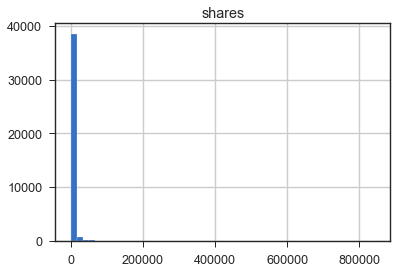

In [11]:
df.hist('shares',bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ae01438>]],
      dtype=object)

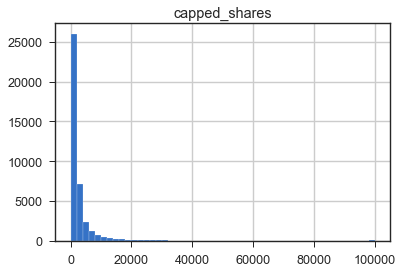

In [13]:
df['capped_shares'] = np.where(df.shares > 100000, 100000, df.shares)
df.hist('capped_shares', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ae06940>]],
      dtype=object)

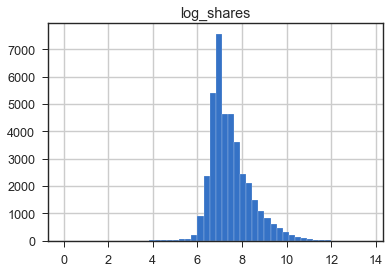

In [14]:
df['log_shares'] = df.shares.apply(lambda x: np.log(x))
df.hist('log_shares', bins=50)

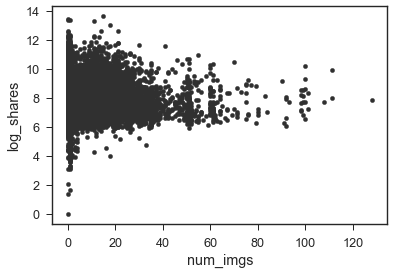

In [15]:
df.plot.scatter('num_imgs', 'log_shares')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ab05b70>]],
      dtype=object)

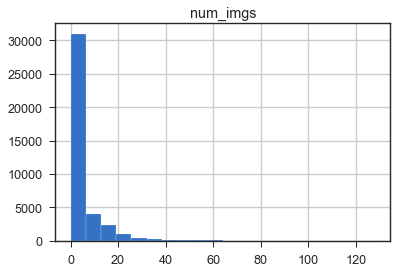

In [16]:
df.hist('num_imgs', bins=20)

In [17]:
df.num_imgs.describe()

count    39644.000000
mean         4.544143
std          8.309434
min          0.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        128.000000
Name: num_imgs, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a1d41d0>]],
      dtype=object)

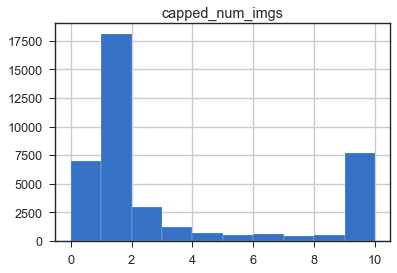

In [18]:
df['capped_num_imgs'] = np.where(df.num_imgs > 10, 10, df.num_imgs)
df.hist('capped_num_imgs')

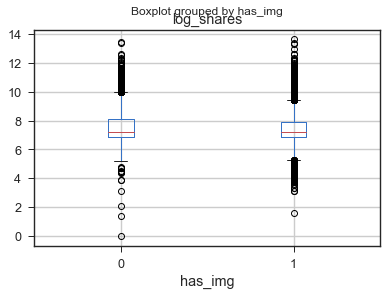

In [19]:
df['has_img'] = np.where(df.num_imgs > 0, 1, 0)
df.boxplot('log_shares', 'has_img')

In [20]:
df.num_videos.describe()

count    39644.000000
mean         1.249874
std          4.107855
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         91.000000
Name: num_videos, dtype: float64

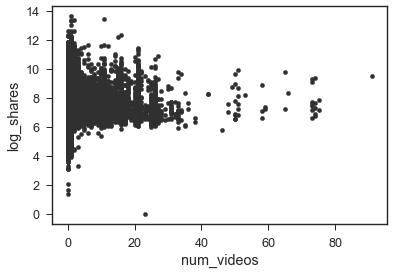

In [21]:
df.plot.scatter('num_videos', 'log_shares')

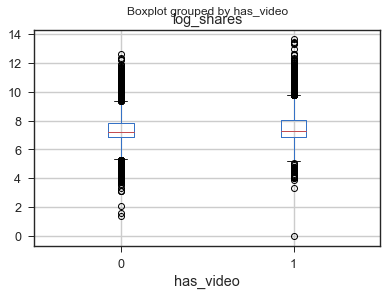

In [22]:
df['has_video'] = np.where(df.num_videos > 0, 1, 0)
df.boxplot('log_shares', 'has_video')

In [24]:
df.num_links.describe()

count    39644.000000
mean        10.883690
std         11.332017
min          0.000000
25%          4.000000
50%          8.000000
75%         14.000000
max        304.000000
Name: num_links, dtype: float64

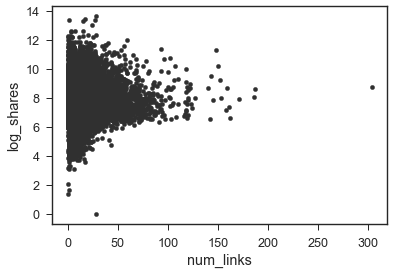

In [23]:
df.plot.scatter('num_links', 'log_shares')

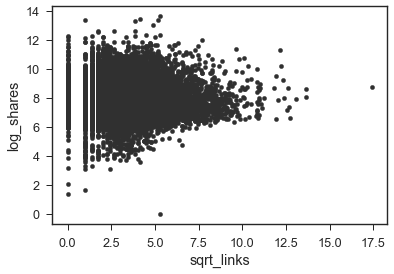

In [25]:
df['sqrt_links'] = df.num_links.apply(lambda x: np.sqrt(x))
df.plot.scatter('sqrt_links', 'log_shares')

In [26]:
df.num_self_links.describe()

count    39644.000000
mean         3.293638
std          3.855141
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max        116.000000
Name: num_self_links, dtype: float64

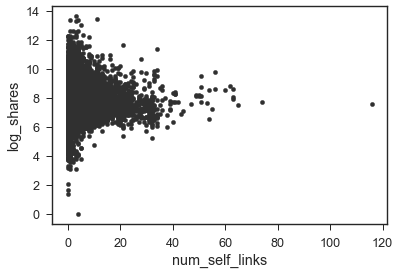

In [27]:
df.plot.scatter('num_self_links', 'log_shares')

In [35]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_links', 'num_self_links', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'lifestyle', 'entertainment',
       'business', 'social_media', 'tech', 'world', 'kw_min_min', 'kw_max_min',
       'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_ref_min_shares',
       'self_ref_max_shares', 'self_ref_avg_shares', 'monday', 'tuesday',
       'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'is_weekend',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'text_subjectivity',
       'text_sentiment_polarity', 'rate_positive_words', 'rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
   

In [128]:
genre_cols = ['lifestyle', 'entertainment', 'business', 'social_media', 'tech', 'world']
day_cols = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

df_genres = df[genre_cols]
df_days = df[day_cols]
df_genres_01 = df[genre_cols]
df_days_01 = df[day_cols]

In [129]:
for col in df_genres.columns:
    df_genres[col] = df_genres[col] * df['shares']

for col in df_days.columns:
    df_days[col] = df_days[col] * df['shares']

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [130]:
df_genres_01.head()

,lifestyle,entertainment,business,social_media,tech,world
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0


In [131]:
df_genres.head()

,lifestyle,entertainment,business,social_media,tech,world
0,0.0,593.0,0.0,0.0,0.0,0.0
1,0.0,0.0,711.0,0.0,0.0,0.0
2,0.0,0.0,1500.0,0.0,0.0,0.0
3,0.0,1200.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,505.0,0.0


In [105]:
df_days.head()

,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,593.0,0.0,0.0,0.0,0.0,0.0,0.0
1,711.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1500.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1200.0,0.0,0.0,0.0,0.0,0.0,0.0
4,505.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
# df_genres = df_genres.reindex(df_genres.mean().sort_values().index, axis=1)
df_genres = df_genres.reindex(df_genres_01.sum().sort_values().index, axis=1)
df_genres_01 = df_genres_01.reindex(df_genres_01.sum().sort_values().index, axis=1)

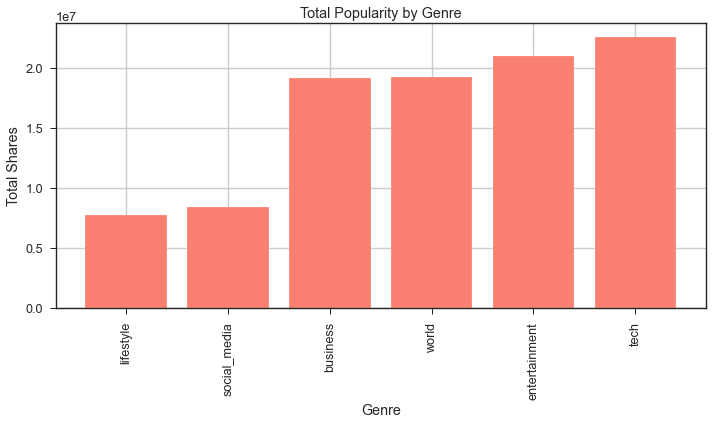

In [108]:
sns.set_style('ticks')

plt.figure(figsize=(10,6))
plt.bar(df_genres.columns, df_genres.sum(), color='salmon') 
plt.xticks(rotation='vertical')

plt.title('Total Popularity by Genre')
plt.ylabel('Total Shares')
plt.xlabel('Genre')
plt.grid(True)
plt.tight_layout() 
#automatically adjusts plot so that it fits into the figure area.
plt.show() 
#display our graph

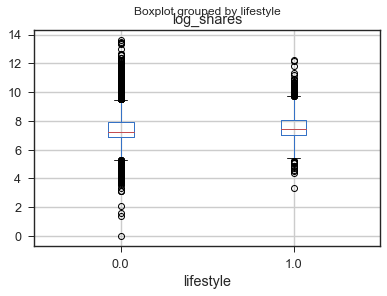

In [186]:
df.boxplot('log_shares', 'lifestyle')

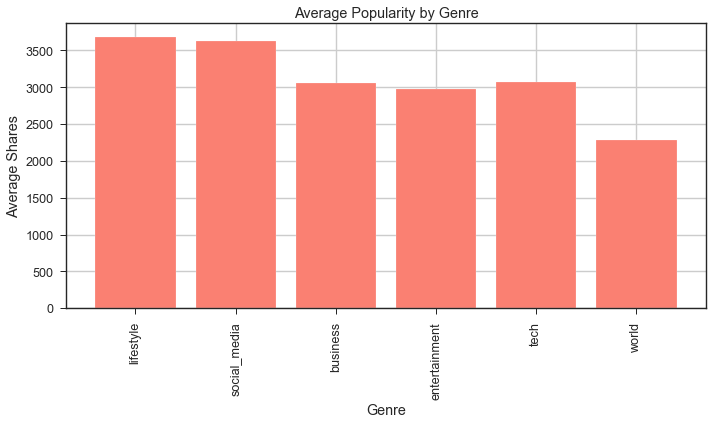

In [152]:
sns.set_style('ticks')

plt.figure(figsize=(10,6))
plt.bar(df_genres.columns, df_genres.sum()/df_genres.astype(bool).sum(axis=0), color='salmon') 
plt.xticks(rotation='vertical')

plt.title('Average Popularity by Genre')
plt.ylabel('Average Shares')
plt.xlabel('Genre')
plt.grid(True)
plt.tight_layout() 
#automatically adjusts plot so that it fits into the figure area.
plt.show() 
#display our graph

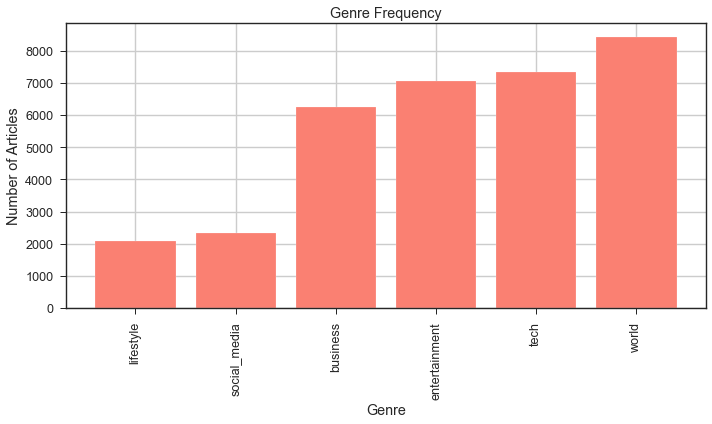

In [147]:
sns.set_style('ticks')

plt.figure(figsize=(10,6))
plt.bar(df_genres_01.columns, df_genres_01.sum(), color='salmon') 
plt.xticks(rotation='vertical')

plt.title('Genre Frequency')
plt.ylabel('Number of Articles')
plt.xlabel('Genre')
plt.grid(True)
plt.tight_layout() 
#automatically adjusts plot so that it fits into the figure area.
plt.show() 
#display our graph

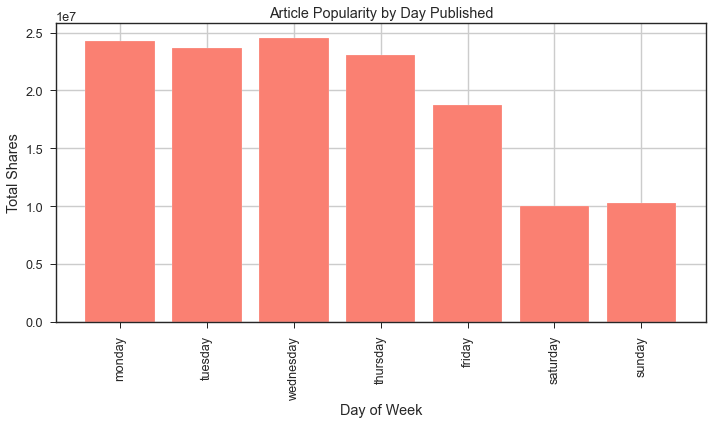

In [110]:
sns.set_style('ticks')

plt.figure(figsize=(10,6))
plt.bar(df_days.columns, df_days.sum(), color='salmon') 
plt.xticks(rotation='vertical')

plt.title('Article Popularity by Day Published')
plt.ylabel('Total Shares')
plt.xlabel('Day of Week')
plt.grid(True)
plt.tight_layout() 
#automatically adjusts plot so that it fits into the figure area.
plt.show() 
#display our graph

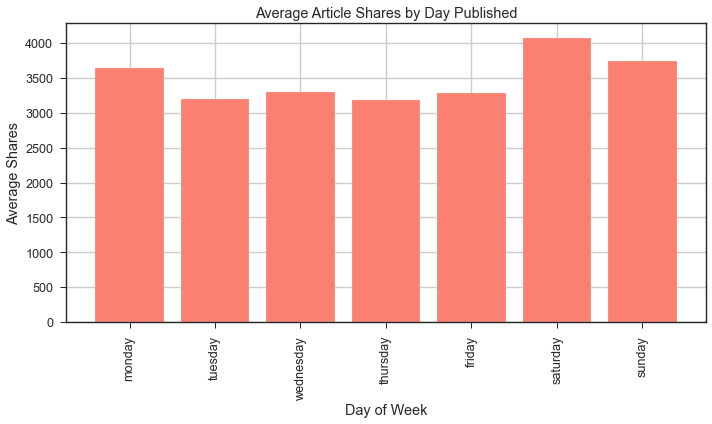

In [112]:
sns.set_style('ticks')

plt.figure(figsize=(10,6))
plt.bar(df_days.columns, df_days.sum()/df_days.astype(bool).sum(axis=0), color='salmon') 
plt.xticks(rotation='vertical')

plt.title('Average Article Shares by Day Published')
plt.ylabel('Average Shares')
plt.xlabel('Day of Week')
plt.grid(True)
plt.tight_layout() 
#automatically adjusts plot so that it fits into the figure area.
plt.show() 
#display our graph

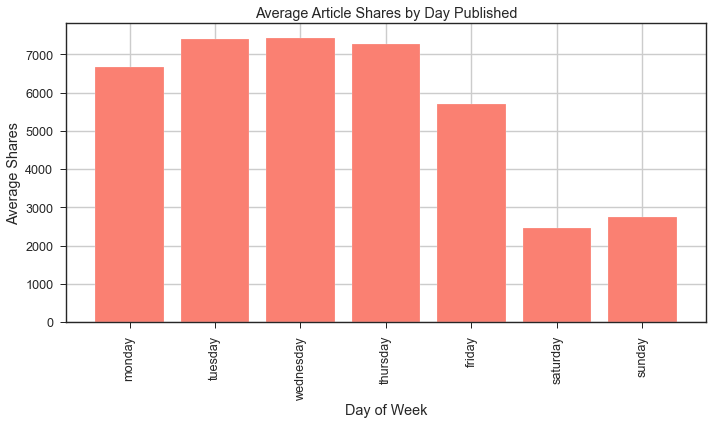

In [133]:
sns.set_style('ticks')

plt.figure(figsize=(10,6))
plt.bar(df_days_01.columns, df_days_01.sum(), color='salmon') 
plt.xticks(rotation='vertical')

plt.title('Popularity of Publishing Day')
plt.ylabel('Average Shares')
plt.xlabel('Day of Week')
plt.grid(True)
plt.tight_layout() 
#automatically adjusts plot so that it fits into the figure area.
plt.show() 
#display our graph

In [98]:
df.shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [157]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_links', 'num_self_links', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'lifestyle', 'entertainment',
       'business', 'social_media', 'tech', 'world', 'kw_min_min', 'kw_max_min',
       'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_ref_min_shares',
       'self_ref_max_shares', 'self_ref_avg_shares', 'monday', 'tuesday',
       'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'is_weekend',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'text_subjectivity',
       'text_sentiment_polarity', 'rate_positive_words', 'rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
   

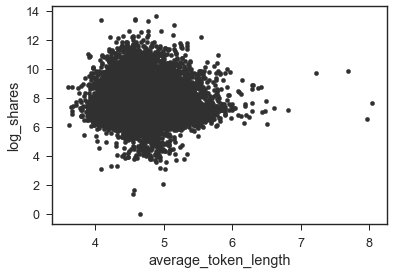

In [161]:
df['average_token_length'] = np.where(df.average_token_length == 0, df.average_token_length.mean(), df.average_token_length)
df.plot.scatter('average_token_length', 'log_shares')

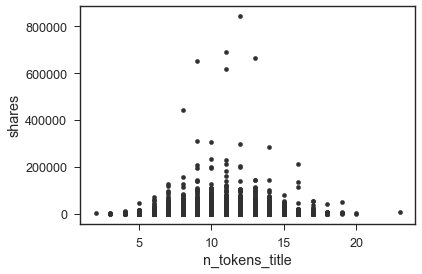

In [163]:
df.plot.scatter('n_tokens_title', 'shares')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x4bf12f080>]],
      dtype=object)

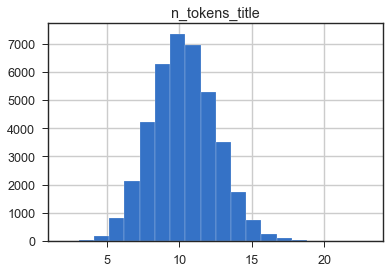

In [167]:
df.hist('n_tokens_title', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x423aaa518>]],
      dtype=object)

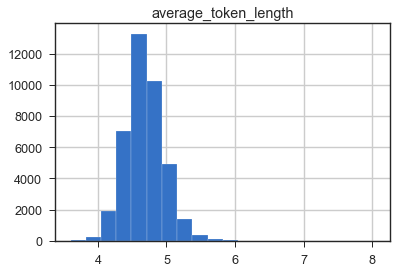

In [166]:
df.hist('average_token_length', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x4ad0cd940>]],
      dtype=object)

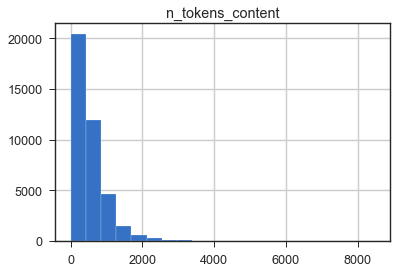

In [168]:
df.hist('n_tokens_content', bins=20)

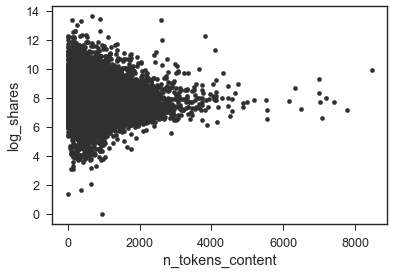

In [171]:
df.plot.scatter('n_tokens_content', 'log_shares')

In [173]:
df.n_tokens_content.describe()

count    39644.000000
mean       546.514731
std        471.107508
min          0.000000
25%        246.000000
50%        409.000000
75%        716.000000
max       8474.000000
Name: n_tokens_content, dtype: float64

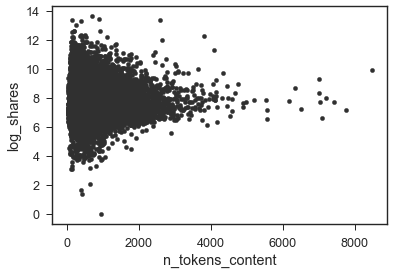

In [174]:
df['n_tokens_content'] = np.where(df.n_tokens_content == 0, df.n_tokens_content.median(), df.n_tokens_content)
df.plot.scatter('n_tokens_content', 'log_shares')

In [178]:
df.n_unique_tokens.describe()

count    39644.000000
mean         0.530547
std          0.137110
min          0.000000
25%          0.470870
50%          0.539221
75%          0.608696
max          1.000000
Name: n_unique_tokens, dtype: float64

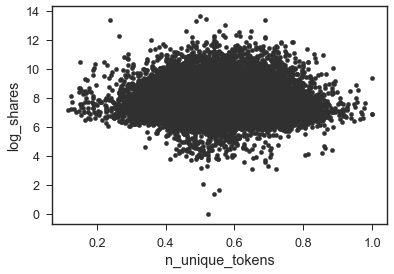

In [179]:
df['n_unique_tokens'] = np.where(df.n_unique_tokens > 1, df.n_unique_tokens.median(), df.n_unique_tokens)
df['n_unique_tokens'] = np.where(df.n_unique_tokens == 0, df.n_unique_tokens.median(), df.n_unique_tokens)
df.plot.scatter('n_unique_tokens', 'log_shares')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x4235ee550>]],
      dtype=object)

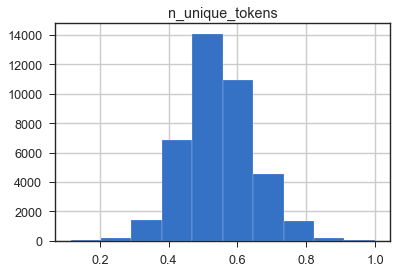

In [181]:
df.hist('n_unique_tokens')

In [183]:
df['n_unique_tokens'].corr(df['shares'])

0.008269381098118632

In [188]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_links', 'num_self_links', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'lifestyle', 'entertainment',
       'business', 'social_media', 'tech', 'world', 'kw_min_min', 'kw_max_min',
       'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_ref_min_shares',
       'self_ref_max_shares', 'self_ref_avg_shares', 'monday', 'tuesday',
       'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'is_weekend',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'text_subjectivity',
       'text_sentiment_polarity', 'rate_positive_words', 'rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
   

In [189]:
df.drop(columns=['url','timedelta','capped_shares','capped_num_imgs'], inplace=True)

In [201]:
df['avg_positive_polarity'].corr(df['avg_negative_polarity'])

-0.275704996277653

In [239]:
df_features = df.drop(columns=['shares', 'log_shares', 'n_unique_tokens', 'n_non_stop_words',
                               'social_media','kw_max_max', 'self_ref_min_shares', 'self_ref_max_shares',
                               'sunday', 'saturday', 'LDA_00', 'avg_positive_polarity', 'sqrt_links',
                               'n_non_stop_unique_tokens', 'tech', 'max_positive_polarity', 'min_negative_polarity',
                               'abs_title_sentiment_polarity', 'num_videos', 'max_negative_polarity', 'rate_negative_words',
                              'text_sentiment_polarity', 'rate_positive_words', 'avg_negative_polarity', 'has_img'])

In [283]:
df_features = df[['n_tokens_title', 'n_tokens_content',
'lifestyle', 'entertainment',
       'business', 'tech', 'world', 'is_weekend',
       'text_subjectivity',
       'text_sentiment_polarity', 'rate_positive_words', 'rate_negative_words',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity',
       'has_img', 'has_video']]

In [284]:
col_list = '+'.join(df_features.columns)
f = 'log_shares~' + col_list
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     181.1
Date:                Tue, 05 May 2020   Prob (F-statistic):               0.00
Time:                        16:09:32   Log-Likelihood:                -51745.
No. Observations:               39644   AIC:                         1.035e+05
Df Residuals:                   39624   BIC:                         1.037e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        7.6000      0.039    197.357      0.000       7.524       7.675
n_tokens_title                   0.0025      0.002      1.119      0.263      -0.002       0.007
n_tokens_content                 0.0001   1.02e-05     10.249      0.000    8.48e-05       0.000
lifestyle                       -0.1775      0.022     -8.021      0.000      -0.221      -0.134
entertainment                   -0.4881      0.015    -32.821      0.000      -0.517      -0.459
business                        -0.3074      0.016    -19.484      0.000      -0.338      -0.276
tech                            -0.1702      0.015    -11.437      0.000      -0.199      -0.141
world                           -0.5344      0.015    -35.557      0.000      -0.564      -0.505
is_weekend                       0.2920      0.013     21.823      0.000       0.266       0.318
text_subjectivity                0.7444      0.059     12.654      0.000       0.629       0.860
text_sentiment_polarity         -0.2208      0.083     -2.657      0.008      -0.384      -0.058
rate_positive_words[0]          -0.9675      0.508     -1.906      0.057      -1.963       0.028
rate_positive_words[1]          -0.3052      0.048     -6.337      0.000      -0.400      -0.211
rate_negative_words[0]           0.1920      1.004      0.191      0.848      -1.776       2.160
rate_negative_words[1]          -0.4772      0.068     -7.006      0.000      -0.611      -0.344
title_sentiment_polarity         0.0805      0.019      4.185      0.000       0.043       0.118
abs_title_subjectivity           0.1242      0.027      4.654      0.000       0.072       0.177
abs_title_sentiment_polarity     0.1218      0.024      5.175      0.000       0.076       0.168
has_img                          0.0089      0.013      0.668      0.504      -0.017       0.035
has_video                        0.1222      0.010     12.000      0.000       0.102       0.142
==============================================================================
Omnibus:                     7285.299   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18886.140
Skew:                           1.009   Prob(JB):                         0.00
Kurtosis:                       5.714   Cond. No.                     1.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

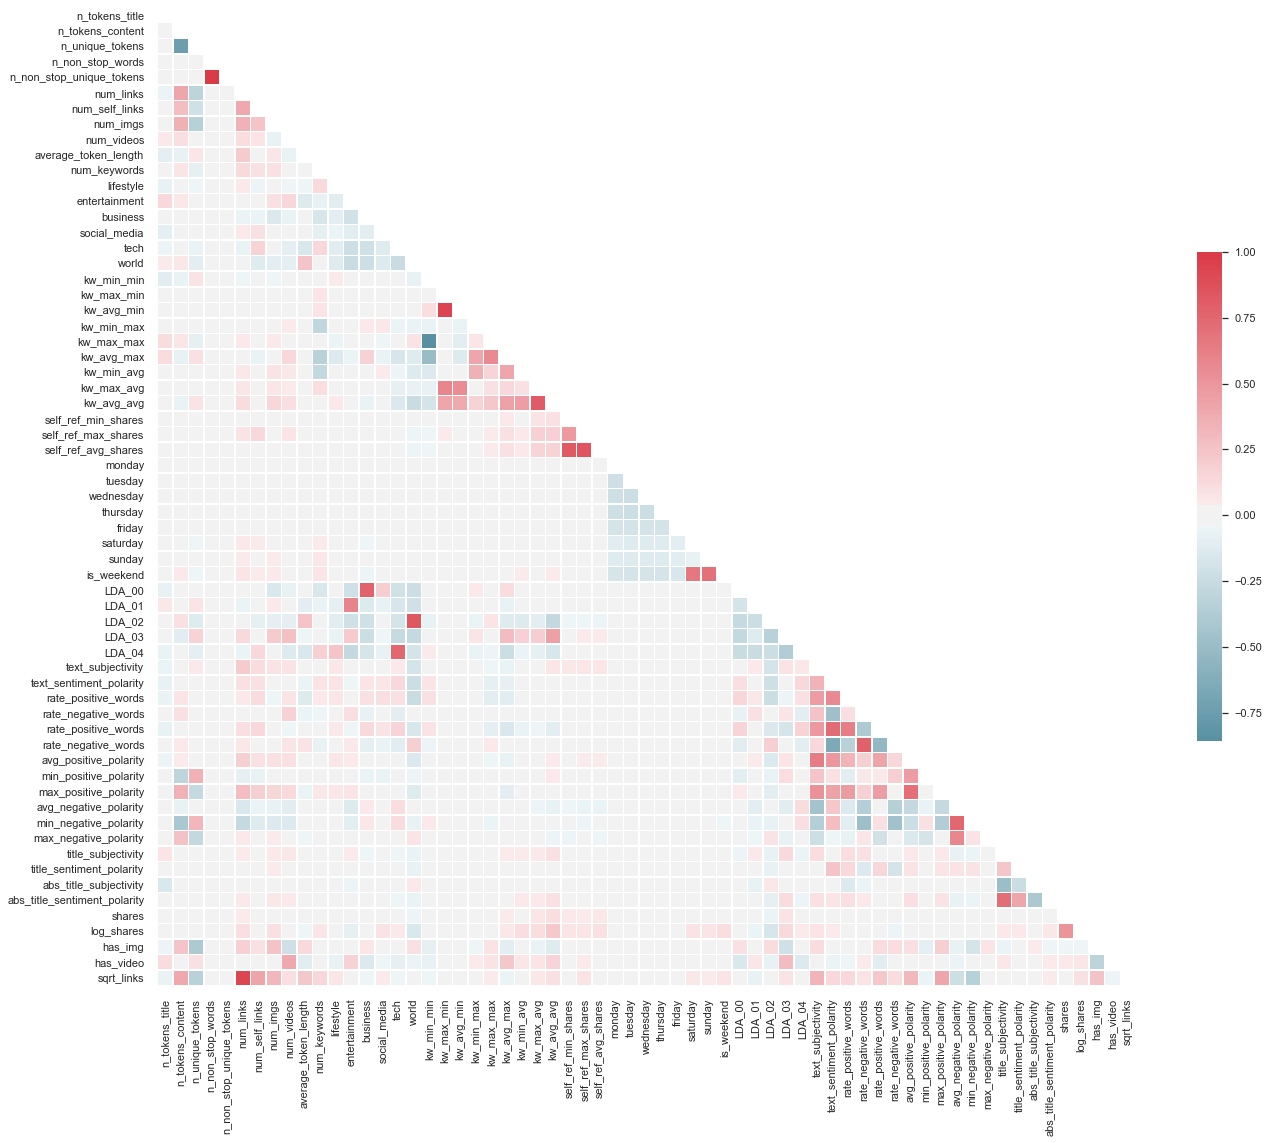

In [210]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})